Niccolò Zoboli          
Matricola: VR508441

<b>Homework</b>

1. Create a chart to show how the relative share of various playlist_genres has changed over time.
2. Create a multiple line chart to show the evolution of the average song properties (only those normalized in the range 0-1) over time.
3. Create a small multiple chart with histograms of track popularity for the different genres. Choose an optimal binning.
4. Compare the distributions of the average song duration for the different genres using a visualization idiom for statistical analysis.
5. Create a chart showing how much the attributes (popularity, danceability, energy, loudness, acousticness, instrumentalness, liveness, valence, tempo) are correlated. Use a proper colormap.
6. Visualize a scatter plot with songs released in 2010, representing loudness and danceability on the x-y coordinates, dots colored by genres, and using a different mark (pre-attentive) to make a specific artist of your interest evident.

 





In [5]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime


In [6]:
songs = pd.read_csv("spotify_songs.csv")

# Check row and column numbers

rows = songs.shape[0] 
cols = songs.shape[1]
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))


#print(songs.isnull().sum())
songs = songs.dropna() 

# Adding 'release_year' column
songs['year'] = pd.DatetimeIndex(songs['track_album_release_date']).year.astype(int)

songs['duration'] = songs['duration_ms']/1000
songs.sort_values(by='year', ascending=True)
songs.head()

Rows   : 32833
Columns: 23


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,duration
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,194.754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,162.600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,176.616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,169.093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,189.052


In [7]:
#how to sort artists
art = songs.groupby(['track_artist']).agg(
    items=('track_id', 'count'),
    popularity=('track_popularity', 'mean')
).sort_values(by='items', ascending=False)


artsel=art[art["items"]>10]
print(artsel)

                  items  popularity
track_artist                       
Martin Garrix       161   47.204969
Queen               136   43.000000
The Chainsmokers    123   57.699187
David Guetta        110   53.436364
Don Omar            102   41.950980
...                 ...         ...
Duran Duran          11   58.090909
Macross 82-99        11   40.272727
Wolfgang Lohr        11   39.454545
MAX                  11   66.272727
Nio Garcia           11   68.363636

[536 rows x 2 columns]


In [8]:
#how to aggregate data
songagg = songs.groupby(['playlist_genre','year']).agg(
    items=('track_id', 'count'),
    popularity=('track_popularity', 'mean')
).reset_index()

songagg.tail()

,playlist_genre,year,items,popularity
297,rock,2016,77,38.155844
298,rock,2017,116,37.112069
299,rock,2018,129,40.968992
300,rock,2019,577,36.178510
301,rock,2020,48,39.458333


1. Create a chart to show how the relative share of various playlist_genres has changed over time.

In [17]:
# Aggregate data by genre and year
genre_year_agg = songs.groupby(['playlist_genre', 'year']).agg(
    items=('track_id', 'count')
).reset_index()
# Calculate the relative share for each genre in each year
genre_year_agg['relative_share'] = genre_year_agg.groupby('year')['items'].transform(lambda x: x / x.sum())



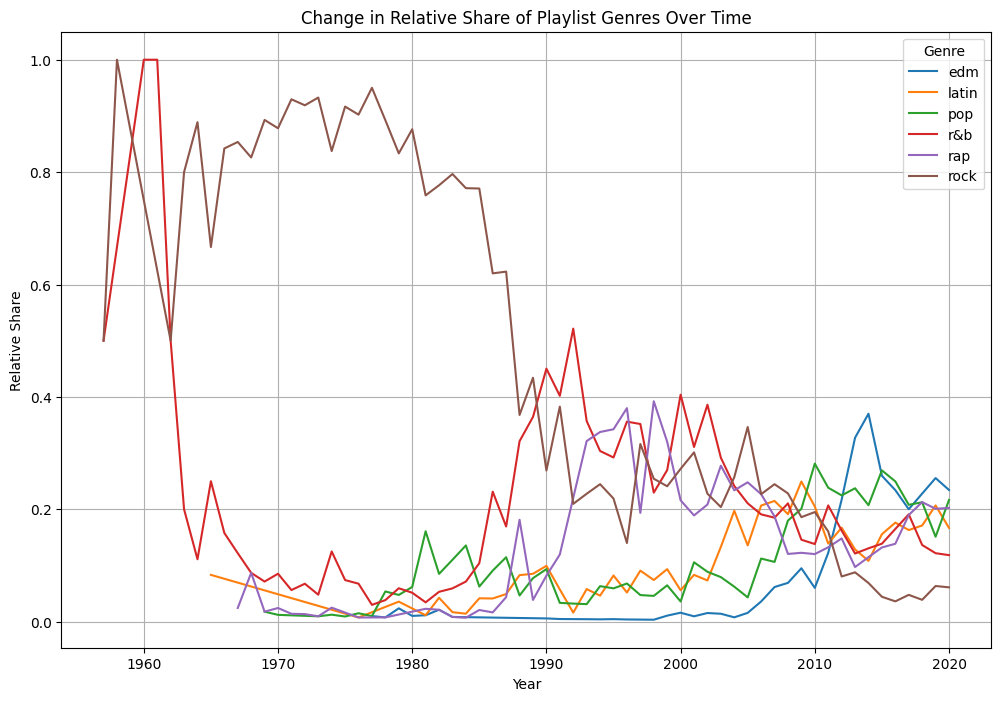

In [20]:
plt.figure(figsize=(12, 8))
for genre in genre_year_agg['playlist_genre'].unique():
    genre_data = genre_year_agg[genre_year_agg['playlist_genre'] == genre]      #plot
    plt.plot(genre_data['year'], genre_data['relative_share'], label=genre)
plt.title("Change in Relative Share of Playlist Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Relative Share")
plt.legend(title="Genre")
plt.grid(True)
plt.show()

2. Create a multiple line chart to show the evolution of the average song properties (only those normalized in the range 0-1) over time.

In [15]:
# Select normalized columns and compute yearly averages
normalized_columns = ['danceability', 'energy', 'speechiness', 'acousticness', 
                      'instrumentalness', 'liveness', 'valence']

normalized_agg = songs.groupby('year')[normalized_columns].mean().reset_index()     #mean and value by year 



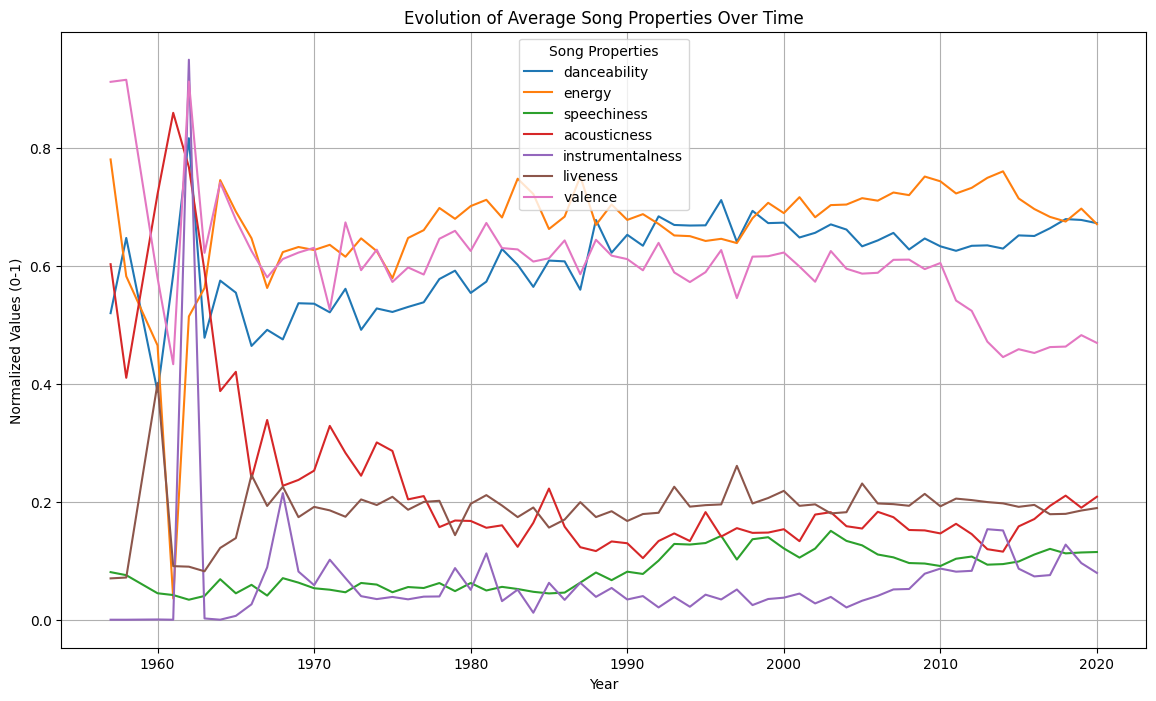

In [21]:
# Plot 
plt.figure(figsize=(14, 8))
for col in normalized_columns:
    plt.plot(normalized_agg['year'], normalized_agg[col], label=col)
plt.title("Evolution of Average Song Properties Over Time")
plt.xlabel("Year")
plt.ylabel("Normalized Values (0-1)")
plt.legend(title="Song Properties")
plt.grid(True)
plt.show()

3. Create a small multiple chart with histograms of track popularity for the different genres. Choose an optimal binning.

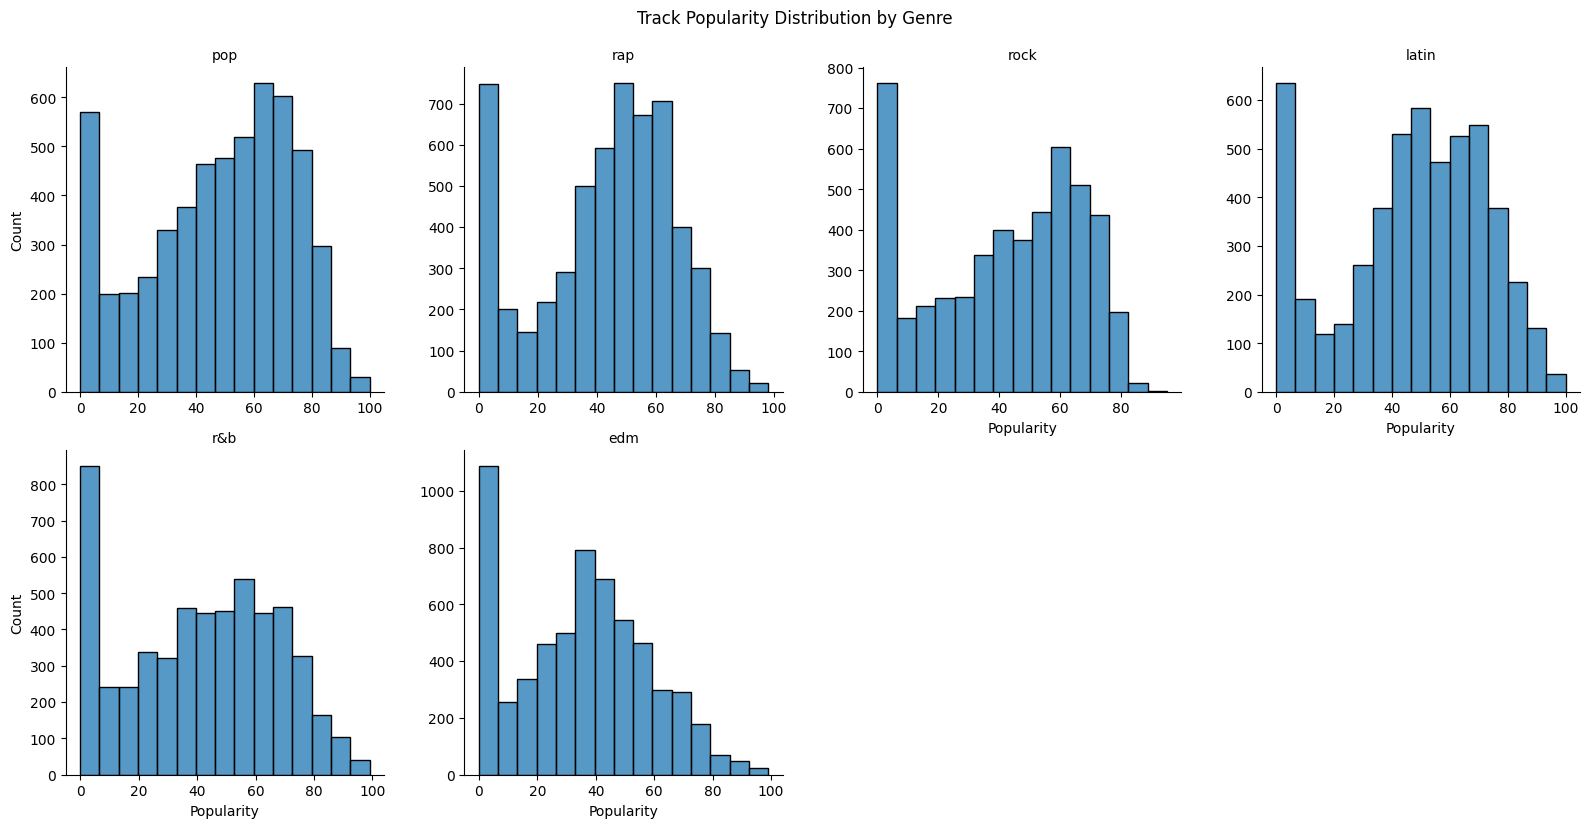

In [22]:
popular_genre = songs[['playlist_genre', 'track_popularity']]        # Filter necessary columns

# Create small multiples for track popularity
g = sns.FacetGrid(popular_genre, col="playlist_genre", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "track_popularity", bins=15, kde=False)
g.set_titles("{col_name}")
g.set_axis_labels("Popularity", "Count")
g.fig.suptitle("Track Popularity Distribution by Genre", y=1.03)
plt.show()


4. Compare the distributions of the average song duration for the different genres using a visualization idiom for statistical analysis.

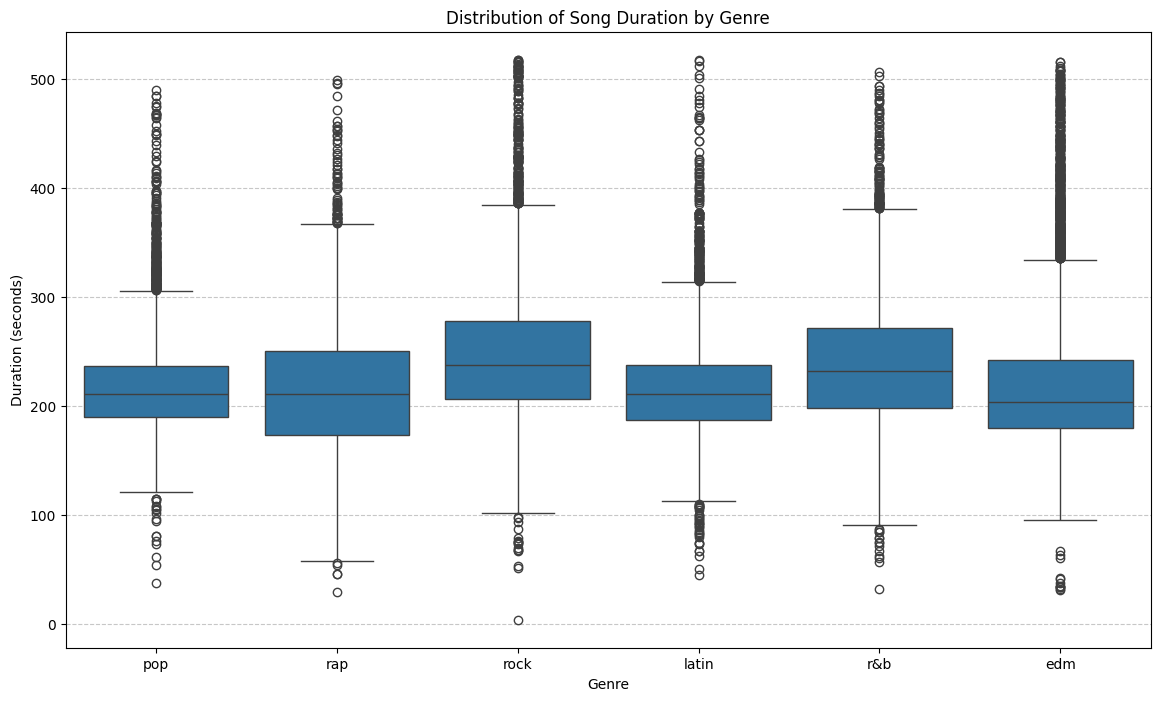

In [23]:
# Filter important columns
duration_genre = songs[['playlist_genre', 'duration']]

#boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='playlist_genre', y='duration', data=duration_genre)
plt.title("Distribution of Song Duration by Genre")
plt.xlabel("Genre")
plt.ylabel("Duration (seconds)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


5. Create a chart showing how much the attributes (popularity, danceability, energy, loudness, acousticness, instrumentalness, liveness, valence, tempo) are correlated. Use a proper colormap.

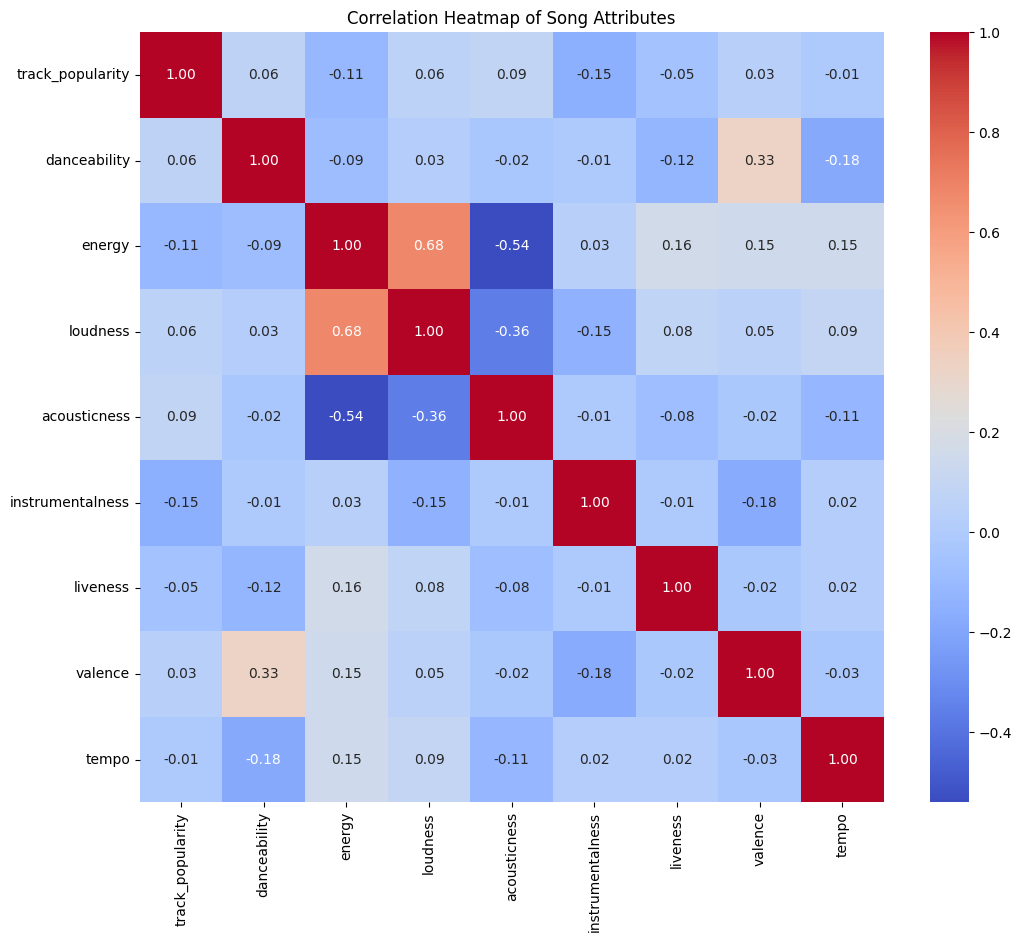

In [26]:
attributes = ['track_popularity', 'danceability', 'energy', 'loudness', 
              'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']   #selected columns 

correlation_matrix = songs[attributes].corr()       #correlation matrix
#plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

plt.title("Correlation Heatmap of Song Attributes")
plt.show()

6. Extra task: visualize a scatter plot with songs released in 2010, representing loudness and danceability on the x-y coordinates, dots colored by genres, and using a different mark (pre-attentive) to make a specific artist of your interest evident.

/var/folders/nj/2z9y9nzj7l3b5rjdxw2r9cmw0000gn/T/ipykernel_2665/3520712345.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_2010['highlight'] = songs_2010['track_artist'] == highlight_artist


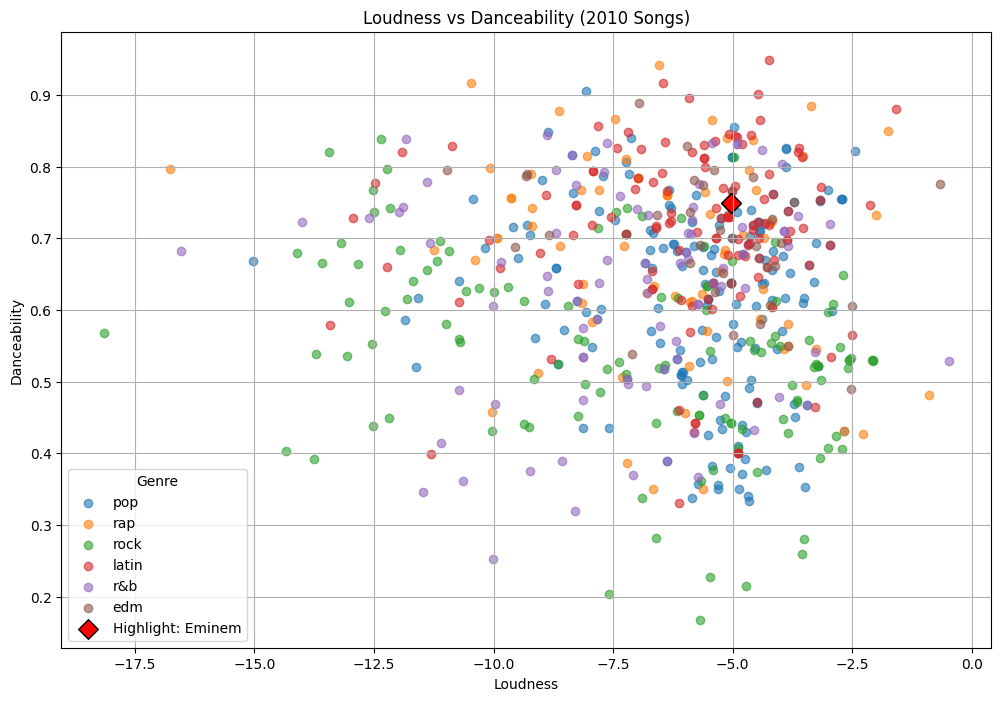

In [30]:
# Filter data for songs released in 2010
songs_2010 = songs[songs['year'] == 2010]

#Artist: Eminem 
highlight_artist = 'Eminem'
songs_2010['highlight'] = songs_2010['track_artist'] == highlight_artist

# Scatter plot
plt.figure(figsize=(12, 8))
for genre in songs_2010['playlist_genre'].unique():
    genre_data = songs_2010[songs_2010['playlist_genre'] == genre]
    plt.scatter(genre_data['loudness'], genre_data['danceability'], label=genre, alpha=0.6)

# Highlight the chosen artist
highlight_data = songs_2010[songs_2010['highlight']]
plt.scatter(highlight_data['loudness'], highlight_data['danceability'], 
            color='red', edgecolor='black', label=f"Highlight: {highlight_artist}", s=100, marker='D')
#plot
plt.title("Loudness vs Danceability (2010 Songs)")
plt.xlabel("Loudness")
plt.ylabel("Danceability")
plt.legend(title="Genre")
plt.grid(True)
plt.show()

